In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

#import data_util as du
#import performance_util as pu
import importlib
#from PCA import PCA

#import softmax_logit as logsoft

%matplotlib inline
data_dir = 'content/drive/sam/X_test.csv'


import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

#def predict(X, parameters):
#    
#    W1 = tf.convert_to_tensor(parameters["W1"])
#    b1 = tf.convert_to_tensor(parameters["b1"])
#    W2 = tf.convert_to_tensor(parameters["W2"])
#    b2 = tf.convert_to_tensor(parameters["b2"])
##    W3 = tf.convert_to_tensor(parameters["W3"])
##    b3 = tf.convert_to_tensor(parameters["b3"])
#    
##    params = {"W1": W1,
##              "b1": b1,
##              "W2": W2,
##              "b2": b2,
##              "W3": W3,
##              "b3": b3}
#
#    params = {"W1": W1,
#              "b1": b1,
#              "W2": W2,
#              "b2": b2}    
#    
#    x = tf.placeholder("float", [12288, 1])
#    
#    z3 = forward_propagation(x, params)
#    p = tf.argmax(z3)
#    
#    with tf.Session() as sess:
#        prediction = sess.run(p, feed_dict = {x: X})
#        
#    return prediction











import numpy as np
import pandas as pd
import gzip
import glob
from scipy import misc
# Reference - https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
# Returns flattened images and correponding labels
def load_mnistx(path, nlabels):
	X_train =[]
	Y_train = []
	for i in range(nlabels):
	    for image_path in glob.glob(path+str(i)+ "/*.png" ) :
	        image = misc.imread(image_path)
	        image = image.reshape(784,)
	        X_train.append(image)
	        Y_train.append(i)
	Y_train = np.asarray(Y_train)        
	X_train = np.asarray(X_train)
	return X_train, Y_train	
def load_fashion_mnist(path, label_present = True):
	"""Load MNIST data from `path`"""
	labels_path = path + '_labels/data/'
	images_path = path + '_images/data/'
	
	labels = []
	if label_present:
		with gzip.open(labels_path, 'rb') as lbpath:
			labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)	
		labels = np.expand_dims(labels, axis = 1)

	with gzip.open(images_path, 'rb') as imgpath:
		images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

	if label_present:
		return images, labels

	return images

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

def load_medical(path, label_map, label_present = True):
	df = pd.read_csv(path)
	df.fillna(df.mean(), inplace=True)

	df = df.applymap(lambda s: label_map.get(s) if s in label_map else s)

	X = df[['TEST1' , 'TEST2', 'TEST3']].as_matrix()
	
	if label_present:
		Y = df[['Health']].as_matrix()
		return X, Y

	return X

def load_railway(path, sex_map, class_map, label_present = True, one_hot = True):
	df = pd.read_csv(path)
	df.fillna(df.mode().iloc[0], inplace=True)

	df = df.applymap(lambda s: sex_map.get(s) if s in sex_map else s)
	df = df.applymap(lambda s: class_map.get(s) if s in class_map else s)

	X = df[['budget', 'memberCount', 'preferredClass', 'sex', 'age']].as_matrix()

	unique_pc = np.unique((df['preferredClass'].values))
	pC = np.zeros(X.shape[0], unique_pc[-1])
	pC[np.arange(X.shape[0]), df['preferredClass'].values] = 1

	sx = np.zeros(X.shape[0], 1)
	sx[np.arange(X.shape[0]), df['sex'].values] = 1

	X_one_hot = np.hstack((df[['budget', 'memberCount', 'age']].as_matrix(), pC, sx)) 

	if label_present:
		Y = df[['boarded']].as_matrix()
		if one_hot:
			return X_one_hot, Y
		return X, Y

	if one_hot:
		return X_one_hot
	return X 

def split_data(X, Y, train_ratio, random_state = 0):
	data = np.random.RandomState(seed = random_state).permutation(np.hstack((X, Y)))

	data_train = data[:int(train_ratio * data.shape[0]),:]
	data_test = data[int(train_ratio * data.shape[0]):,:]

	return data_train[:, :-1], data_train[:, -1:], data_test[:, :-1], data_test[:, -1:]

def normalize(X, std_tol = 0.00001):
	X = X.astype('float')
	mu = np.mean(X, axis = 0)
	std = np.std(X, axis = 0)
	std[std < std_tol] = 1

	return (X - mu)/std, mu, std


def normalize2(X, std_tol = 0.00001):
	X = X.astype('float')
	
	norm = np.expand_dims(np.linalg.norm(X, axis = 1) , axis = 1)
	norm[norm < std_tol] = 1

	return X/norm



def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels



data_dir2 = '/content/drive/sam/data/mnist/'
random_seed = 1
np.set_printoptions(precision=4)

In [0]:
X_train, Y_train = load_mnist(data_dir2)
#Y_train = Y_train.reshape(len(Y_train) , 1)

#X_val, Y_val = du.load_fashion_mnist(data_dir + 't10k')

print(X_train.shape)
print(Y_train.shape)

#X_test, Y_test = du.load_mnistx(data_dir,10)
#Y_test = Y_test.reshape(len(Y_test), 1)


#print(X_test.shape)
#print(Y_test.shape)

X_val, Y_val = load_mnist(data_dir2, 't10k')
X_val = normalize2(X_val)
print(Y_val.shape)

(60000, 784)
(60000,)
(10000,)


In [0]:
!kill -9 -1

In [0]:


!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive



E: Package 'python-software-properties' has no installation candidate
Traceback (most recent call last):
  File "/usr/bin/add-apt-repository", line 136, in <module>
    shortcut = shortcut_handler(line)
  File "/usr/lib/python3/dist-packages/softwareproperties/SoftwareProperties.py", line 1020, in shortcut_handler
    ret = factory(shortcut)
  File "/usr/lib/python3/dist-packages/softwareproperties/ppa.py", line 398, in shortcut_handler
    return PPAShortcutHandler(shortcut)
  File "/usr/lib/python3/dist-packages/softwareproperties/ppa.py", line 355, in __init__
    info = get_ppa_info(self.shortcut)
  File "/usr/lib/python3/dist-packages/softwareproperties/ppa.py", line 326, in get_ppa_info
    ret = get_ppa_info_from_lp(user, ppa)
  File "/usr/lib/python3/dist-packages/softwareproperties/ppa.py", line 101, in get_ppa_info_from_lp
    return get_info_from_lp(lp_url)
  File "/usr/lib/python3/dist-packages/softwareproperties/ppa.py", line 95, in get_info_from_lp
    return get_info_fro

KeyboardInterrupt: ignored

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free:"  + humanize.naturalsize( psutil.virtual_memory().available ), 'I Proc size:'  + humanize.naturalsize( process.memory_info().rss))
 print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Gen RAM Free:12.8 GB I Proc size:534.5 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB
Found GPU at: /device:GPU:0


In [0]:
X_test = pd.read_csv('/content/drive/sam/X_test.csv', header = None)
X_test = X_test.values

Y_test = pd.read_csv('/content/drive/sam/Y_test.csv', header = None)
Y_test = Y_test.values
Y_test = np.reshape(Y_test, (7947,))
Y_test = Y_test.astype(int)


X_train = normalize2(X_train)
X_test = normalize2(X_test)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(7947, 784)
(7947,)


In [0]:
X_test_2 = pd.read_csv('/content/drive/sam/data/x_test.csv')
X_test_2 = X_test_2.values

X_test_2 = np.delete(X_test_2,0, 1)
X_test_2 = normalize2(X_test_2)

X_test_2 = X_test_2.reshape((7947,28,28,1))

print(X_test_2.shape)

(7947, 28, 28, 1)


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(X_train)

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

print(np.sum(pca.explained_variance_ratio_))


print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)

0.9073432472525402
(60000, 100)
(7947, 100)


# LOGISTIC SOFTMAX

In [0]:
logist= logsoft.softmaxLogit( iterations = 10000, Lambda= 0.0, alpha = 0.05, num_classes =10)

logist.fit(X_train_reduced_1, Y_train)

NameError: ignored

In [0]:
result= logist.predict(X_test_reduced_1)

result = result.reshape((len(X_test_reduced_1),))
Y_test_1 = Y_test_1.reshape((len(X_test_reduced_1),))

print( "Accuracy:" , pu.model_accuracy(result, Y_test_1))

In [0]:
result= logist.predict(X_test_reduced_1)

result = result.reshape((len(X_test_reduced_1),))
Y_test = Y_test.reshape((len(X_test_reduced_1),))

#np.savetxt("foo.csv", a, delimiter=",")

print( "Accuracy:" , pu.model_accuracy(result, Y_test))
print( "macro_average: ", pu.model_macro_average(result, Y_test, 10))
print("micro_average: ", pu.model_micro_average(result, Y_test, 10))
print( "f1: ", pu.model_f1(result, Y_test,10))
print("precision: ", pu.model_precision(result, Y_test,10))
print("recall:", pu.model_recall(result, Y_test,10))


In [0]:
np.savetxt("foo.csv", Y_test, delimiter=",")

In [0]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='rbf') 
  
# fitting x samples and y classes 
clf.fit(X_train_reduced_1, Y_train)

result = clf.predict(X_test_reduced_1) 

result = result.reshape((len(X_test_reduced_1),))
Y_test = Y_test.reshape((len(X_test_reduced_1),))
#np.savetxt("foo.csv", Y_test, delimiter=",")

print( "Accuracy:" , pu.model_accuracy(result, Y_test))

NameError: ignored

In [0]:
from sklearn.metrics import accuracy_score

print( "Accuracy:" , accuracy_score(result, Y_test))

Accuracy: 0.4563986409966025


# MLP

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-4,
                    hidden_layer_sizes=(50,20), random_state=1)

clf.fit(X_train_reduced_1, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score

result = clf.predict(X_test_reduced_1)
print(result.shape)

result = result.reshape((len(X_test),))
Y_test = Y_test.reshape((len(X_test_reduced_1),))
print( "Accuracy:" , accuracy_score(result, Y_test))

(7947,)
Accuracy: 0.5512772115263621


In [0]:
result = clf.predict(X_test_1)
print(result.shape)

result = result.reshape((len(X_test),))
Y_test = Y_test.reshape((len(X_test_reduced_1),))
#print( "Accuracy:" , pu.model_accuracy(result, Y_test))

In [0]:
np.savetxt("foo.csv", result, delimiter=",")

# TensorFlow NN

In [0]:
import tensorflow as tf

In [0]:
x = tf.placeholder(tf.float32, [0,784])
y = tf.placeholder(tf.float32, [0, 10])



W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))


In [0]:
with tf.name_scope( "Wx_b") as scope:
    model= tf.nn.softmax(tf.matmul(x,W)+b)

w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("bias", b)  

In [0]:
with tf.name_scope( "cost_func") as scope:
    cost= tf.reduce_sum(y*tf.log(model))
    tf.summary.scalar("cost_func", cost)

In [0]:
with tf.name_scope( "GD") as scope:
    GD = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
    

In [0]:
init = tf.global_variables_initializer()
merged_summary_operator = tf.summary.merge_all()


In [0]:
with tf.Session() as session:
    session.run(init)
    
    summary_writer = tf.summary.FileWriter('./logs', graph = session.graph)
    for itr in range(1000):
        batch_xs, batch_ys = mnist_train.next_batch(batch_size)
        session.run(GD, feed_dict= {x: batch_xs, y:batch_ys})
        
        avg_cost = session.run(cost_func, feed_dict = {x:batch_xs, y:batch_ys})
        
        summary_str = session.run(merged_summary_operator, feed_dict={x:batch_xs, y:batch_ys})
        

In [0]:
session.run(train)
print(session.run(w))

In [0]:
for i in range(1000):
    session.run(train)
    print(session.run(w))
    

In [0]:
data_dirx = 'C:/Users/rupes/OneDrive/Pictures/Screenshots/'
X_test_1, Y_test_1 = du.load_mnistx(data_dirx,1)
Y_test_1 = Y_test_1.reshape(len(Y_test_1), 1)

In [0]:
print(X_test_1.shape)

# Signal

[ 540  639 1024 1154 1608 1741 2094 2220 2709 2785 3183 3319 3616 3672
 4127 4165 4599 4719 5175 5286]


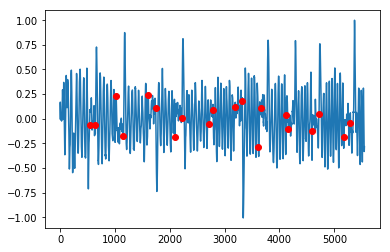

In [0]:
data_dir_2 = './data/RS_data/'
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt


x_data = genfromtxt( data_dir_2 + 'signals/s2.csv', delimiter=',')
y_data = pd.read_csv( data_dir_2 + 'GT.csv')

y_data_1 = y_data['S2'].values

print(y_data_1)
index = [i for i in range(len(x_data))]

x_bata = np.zeros(len(y_data_1))

for i in range(len(y_data_1)):
    x_bata[i] = x_data[y_data_1[i]] 
    
plt.plot(index, x_data)
plt.plot(y_data_1 ,x_bata, 'ro')

plt.show()


# CNN

In [0]:
import math
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
#from cnn_utils import *

%matplotlib inline
np.random.seed(1)


# Loading the data (signs)
X_train_orig = X_train.reshape((60000,28,28,1))
Y_train_orig = Y_train
X_test_orig = X_test.reshape((7947,28,28,1))
#X_val_1 = X_val.reshape((10000,28,28,1))
Y_test_orig = Y_test
classes = 10


X_train_1 = X_train_orig
X_test_1 = X_test_orig
Y_train_1 = convert_to_one_hot(Y_train_orig, 10).T
Y_test_1 = convert_to_one_hot(Y_test_orig, 10).T
#Y_val_1 = convert_to_one_hot(Y_val, 10).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train_1.shape))
print ("Y_train shape: " + str(Y_train_1.shape))
print ("X_test shape: " + str(X_test_1.shape))
print ("Y_test shape: " + str(Y_test_1.shape))
conv_layers = {}



number of training examples = 60000
number of test examples = 7947
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (7947, 28, 28, 1)
Y_test shape: (7947, 10)


In [0]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32, shape = (None, n_H0, n_W0, n_C0))
    Y = tf.placeholder(tf.float32, shape = (None, n_y))
    ### END CODE HERE ###
    
    return X, Y

In [0]:
X, Y = create_placeholders(28, 28, 1, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [0]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1", [5,5,1,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [5,5,8,12], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters
  
  
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[0,0,0]))
    print("W2 = " + str(parameters["W2"].eval()[0,0,0]))

W1 = [ 0.1021 -0.1376  0.1279 -0.108  -0.1427  0.0148  0.0012  0.1387]
W2 = [ 0.0685 -0.0923  0.0858 -0.0725 -0.0957  0.0099  0.0008  0.0931  0.0371
  0.0938 -0.0827  0.0774]


In [0]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    ### START CODE HERE ###
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,4,4,1], strides = [1,2,2,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,2,2,1], padding = 'SAME')
    print(P2.shape)
    # FLATTEN
    F = tf.contrib.layers.flatten(P2)
    print(F.shape)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(F, 10, activation_fn = None)
    ### END CODE HERE ###

    return Z3

In [0]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(28, 28, 1, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,28,28,1), Y: np.random.randn(2,10)})
    print("Z3 = " + str(a))
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
    a = sess.run(predict_op, {X: np.random.randn(2,28,28,1)})
    print("a" + str(a)) 
    a = a.astype(int)
    np.savetxt("/content/drive/sam/data/foo.csv", a, delimiter=",")

(?, 7, 7, 12)
(?, 588)
Z3 = [[-0.7411 -0.0435  0.273  -0.6002  0.1567  0.6511  0.5489 -1.2121 -0.0257
   1.6961]
 [-0.5882  0.2837  0.4124 -0.0367  0.2681  0.6451  0.3921 -1.1919 -0.0043
   1.8563]]
a[9 9]


In [0]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    ### END CODE HERE ###
    
    return cost
  
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(28, 28, 1, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,28,28,1), Y: np.random.randn(4,10)})
    print("cost = " + str(a))

(?, 7, 7, 12)
(?, 588)
cost = 6.2654715


In [0]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test,X_test_2, learning_rate = 0.0006,
          num_epochs = 11, minibatch_size = 128, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        a = sess.run(predict_op, {X: X_test_2})
        #print("a" + str(a)) 
        a = a.astype(int)
        print(a)
        np.savetxt("/content/drive/sam/data/foo.csv", a, delimiter=",")
        
         
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        #print(accuracy)
        #train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        #print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return a, predict_op, accuracy, parameters, correct_prediction

(?, 7, 7, 12)
(?, 588)
Cost after epoch 0: 0.783719
Cost after epoch 5: 0.076412
Cost after epoch 10: 0.051953


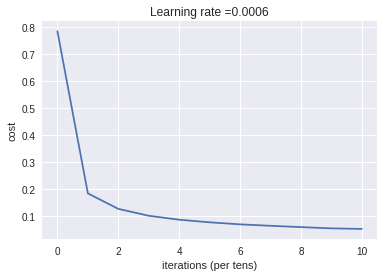

[1 2 6 ... 1 7 7]
Test Accuracy: 0.83465457


In [0]:
a, predict_op ,correct_prediction , accuracy, parameters = model(X_train_1, Y_train_1, X_test_1, Y_test_1,X_test_2)

In [0]:

print(a)
np.savetxt("/content/drive/sam/data/foo.csv", a, delimiter=",")

[0 0 0 ... 7 7 7]


In [0]:
fname = "images/thumbs_up.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(28,28))
plt.imshow(my_image)

# New Section